In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

class NNA(object):
    def __init__(self):
        self.nn_0 = 20  # Número de entradas
        self.nn_1 = 5   # Número de neuronas en la primera capa oculta
        self.nn_2 = 5   # Número de neuronas en la segunda capa oculta
        self.nn_3 = 5   # Número de neuronas en la capa de salida

        # Inicialización de pesos (usando inicialización Xavier)
        self.W1 = np.random.randn(self.nn_1, self.nn_0) * np.sqrt(2. / self.nn_0)
        self.b1 = np.zeros((self.nn_1, 1))
        self.W2 = np.random.randn(self.nn_2, self.nn_1) * np.sqrt(2. / self.nn_1)
        self.b2 = np.zeros((self.nn_2, 1))
        self.W3 = np.random.randn(self.nn_3, self.nn_2) * np.sqrt(2. / self.nn_2)
        self.b3 = np.zeros((self.nn_3, 1))

        # Variables de activación y entradas
        self.Z1 = np.zeros((self.nn_1, 1))
        self.Y1 = np.zeros((self.nn_1, 1))
        self.Z2 = np.zeros((self.nn_2, 1))
        self.Y2 = np.zeros((self.nn_2, 1))
        self.Z3 = np.zeros((self.nn_3, 1))
        self.Y3 = np.zeros((self.nn_3, 1))

    def forward(self, Yo):
        self.Z1 = np.dot(self.W1, Yo) + self.b1
        self.Y1 = self.sig(self.Z1)
        self.Z2 = np.dot(self.W2, self.Y1) + self.b2
        self.Y2 = self.sig(self.Z2)
        self.Z3 = np.dot(self.W3, self.Y2) + self.b3
        self.Y3 = self.sig(self.Z3)
        return self.Y3

    def error(self, Yo, Yd):
        return Yd - self.forward(Yo)

    def errCuad(self, Yo, Yd):
        return np.diag(np.dot(self.error(Yo, Yd).T, self.error(Yo, Yd)))

    def backpropagation(self, Yo, Yd):
        delta3 = 2 * np.dot(self.dSig(self.Z3), self.error(Yo, Yd))
        dEdW3 = -np.dot(delta3, self.Y2.T)
        dEdb3 = -delta3

        delta2 = np.dot(np.dot(self.dSig(self.Z2), self.W3.T), delta3)
        dEdW2 = -np.dot(delta2, self.Y1.T)
        dEdb2 = -delta2

        delta1 = np.dot(np.dot(self.dSig(self.Z1), self.W2.T), delta2)
        dEdW1 = -np.dot(delta1, Yo.T)
        dEdb1 = -delta1

        return dEdW3, dEdb3, dEdW2, dEdb2, dEdW1, dEdb1

    def training(self, Yi, Ys):
        eta = 1
        i = 0
        errors = []  # Para almacenar el error en cada iteración

        while max(self.errCuad(Yi, Ys)) > 1e-4 and i < 10000:
            for yo, yd in zip(Yi.T, Ys.T):
                self.W3 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[0]
                self.b3 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[1]
                self.W2 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[2]
                self.b2 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[3]
                self.W1 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[4]
                self.b1 -= eta * self.backpropagation(np.array([yo]).T, np.array([yd]).T)[5]

            errors.append(np.mean(self.errCuad(Yi, Ys)))  # Guardamos el error de cada iteración
            i += 1
            eta = self.funEta(i)

        # Visualización del error durante el entrenamiento
        plt.plot(errors)
        plt.title('Evolución del error durante el entrenamiento')
        plt.xlabel('Iteraciones')
        plt.ylabel('Error cuadrático')
        plt.show()

        return i

    def sig(self, s):
        return 1 / (1 + np.exp(-s))

    def dSig(self, s):
        return np.diag(self.sig(s.T[0]) * (1 - self.sig(s.T[0])))

    def funEta(self, var):
        if var <= 5000:
            return 1.0 - (1.0 * var / 10000)
        else:
            return 0.7 * np.exp(-0.0002 * (var - 5000))


In [ ]:
# Definir los datos de entrada y salida de entrenamiento
A = np.array([[0,0,0,0],[0,1,1,0],[0,0,0,0],[0,1,1,0],[0,1,1,0]])
E = np.array([[0,0,0,0],[0,1,1,1],[0,0,0,1],[0,1,1,1],[0,0,0,0]])
I = np.array([[0,0,0,0],[1,0,0,1],[1,0,0,1],[1,0,0,1],[0,0,0,0]])
O = np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
U = np.array([[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])

# Valores deseados
da = np.array([[1,0,0,0,0]]).T
de = np.array([[0,1,0,0,0]]).T
di = np.array([[0,0,1,0,0]]).T
do = np.array([[0,0,0,1,0]]).T
du = np.array([[0,0,0,0,1]]).T

# Concatenación de los elementos de entrada y salida
Yi = np.concatenate((
    np.array([A.ravel()]).T,
    np.array([E.ravel()]).T,
    np.array([I.ravel()]).T,
    np.array([O.ravel()]).T,
    np.array([U.ravel()]).T,
    np.array([U.ravel()]).T,
    np.array([O.ravel()]).T,
    np.array([I.ravel()]).T,
    np.array([E.ravel()]).T,
    np.array([A.ravel()]).T), axis=1)

Yd = np.concatenate((da, de, di, do, du, du, do, di, de, da), axis=1)


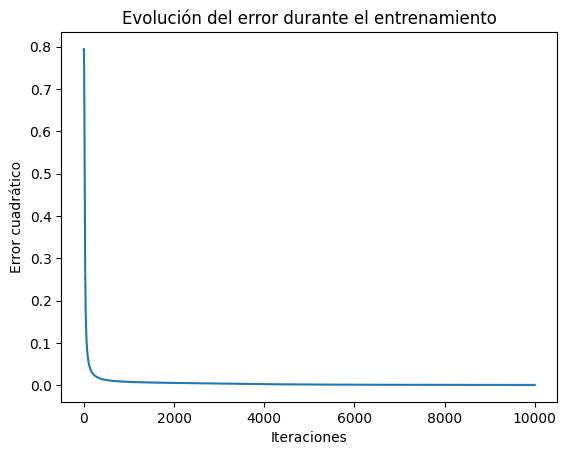

Salida Valor deseado Error
(array([0.98896651]), 7) -> [1] -> [0.01103349]
(array([0.00010286]), 7) -> [0] -> [-0.00010286]
(array([0.00832224]), 7) -> [0] -> [-0.00832224]
(array([4.6551006e-06]), 7) -> [0] -> [-4.6551006e-06]
(array([0.00360945]), 7) -> [0] -> [-0.00360945]

Los valores de salida son aproximados


In [ ]:
# Entrenar la red
nna = NNA()
iterations = nna.training(Yi, Yd)

# Imprimir resultados después del entrenamiento
At = np.array([A.ravel()]).T
print("Salida", "Valor deseado", "Error")
for i in range(5):
    print((nna.forward(At)[i], 7), "->", da[i], "->", nna.error(At, da)[i])

print("\nLos valores de salida son aproximados")